<a href="https://colab.research.google.com/github/Khalid-2402/big-data/blob/main/Lab4_TAXI_SARSA_solved_Khalid_AlShigager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gymnasium
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 11.1 MB/s eta 0:00:00


In [4]:
import numpy as np
import gym

# Set up the Taxi environment
env = gym.make("Taxi-v3")

# Initialize SARSA parameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Initial exploration rate
epsilon_decay = 0.99  # Faster decay for exploration
epsilon_min = 0.1  # Minimum exploration rate
episodes = 500  # Reduced number of episodes
max_steps = 50  # Reduced maximum steps per episode
early_stop_threshold = 50  # Episodes with stable rewards to stop training early

# Initialize the Q-table with zeros
Q = np.zeros((env.observation_space.n, env.action_space.n))

# Function to choose an action using the epsilon-greedy policy
def choose_action(state, epsilon):
    if np.random.random() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(Q[state])  # Exploit

# SARSA Training loop with early stopping
reward_history = []
for episode in range(episodes):
    state = env.reset()
    action = choose_action(state, epsilon)

    total_reward = 0
    for step in range(max_steps):
        next_state, reward, done, _ = env.step(action)
        next_action = choose_action(next_state, epsilon)

        # Update Q-value using the SARSA formula
        Q[state, action] += alpha * (
            reward + gamma * Q[next_state, next_action] - Q[state, action]
        )

        state, action = next_state, next_action
        total_reward += reward

        if done:
            break

    # Decay the exploration rate
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Track rewards for early stopping
    reward_history.append(total_reward)
    if len(reward_history) > early_stop_threshold:
        recent_rewards = reward_history[-early_stop_threshold:]
        if np.std(recent_rewards) < 1.0:  # Check if rewards have stabilized
            print(f"Early stopping at episode {episode}")
            break

# Function to evaluate the learned policy
def evaluate_policy(env, Q, n_episodes=100):
    total_rewards = 0
    for _ in range(n_episodes):
        state = env.reset()
        done = False
        while not done:
            action = np.argmax(Q[state])  # Exploit learned policy
            state, reward, done, _ = env.step(action)
            total_rewards += reward
    return total_rewards / n_episodes

# Evaluate the learned policy
average_reward = evaluate_policy(env, Q)
print(f"Average Reward over 100 episodes: {average_reward:.2f}")


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Average Reward over 100 episodes: -324.38


## The warnings indicate that the Gym environment is using an older version of the step API. These warnings suggest switching to the new API (new_step_api=True) to avoid future compatibility issues.

## The average reward over 100 episodes is very low (-324.38). This suggests that the policy is not learning effectively and may require tuning of hyperparameters or debugging.

In [7]:
# Set up the Taxi environment with new API
env = gym.make("Taxi-v3", new_step_api=True)

# Initialize SARSA parameters
alpha = 0.3  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 1.0  # Initial exploration rate
epsilon_decay = 0.995  # Slower decay for exploration
epsilon_min = 0.1  # Minimum exploration rate
episodes = 1000  # Number of episodes
max_steps = 50  # Max steps per episode

# Initialize the Q-table with zeros
Q = np.zeros((env.observation_space.n, env.action_space.n))

# Function to choose an action using epsilon-greedy policy
def choose_action(state, epsilon):
    if np.random.random() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(Q[state])  # Exploit

# SARSA Training loop
for episode in range(episodes):
    state = env.reset()
    action = choose_action(state, epsilon)

    for step in range(max_steps):
        # Use the new Gym API that includes "truncated"
        next_state, reward, done, truncated, _ = env.step(action)
        next_action = choose_action(next_state, epsilon)

        # Update Q-value using the SARSA formula
        Q[state, action] += alpha * (
            reward + gamma * Q[next_state, next_action] - Q[state, action]
        )

        state, action = next_state, next_action

        if done or truncated:  # End the episode if done or truncated
            break

    # Decay the exploration rate
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

# Function to evaluate the learned policy
def evaluate_policy(env, Q, n_episodes=100):
    total_rewards = 0
    for _ in range(n_episodes):
        state = env.reset()
        done = False
        while not done:
            action = np.argmax(Q[state])  # Exploit learned policy
            # Use the new Gym API that includes "truncated"
            state, reward, done, truncated, _ = env.step(action)
            total_rewards += reward
            if done or truncated:
                break
    return total_rewards / n_episodes

# Evaluate the learned policy
average_reward = evaluate_policy(env, Q)
print(f"Average Reward over 100 episodes: {average_reward:.2f}")


Average Reward over 100 episodes: -95.46


## The reported average reward of -95.46 indicates the SARSA algorithm is not performing optimally. Here are potential reasons and adjustments to improve performance

### Possible Causes of Poor Performance:

1- Insufficient Exploration:

If the agent is not exploring enough, it might get stuck in suboptimal policies.

2- Improper Learning Rate (alpha):

A too-high or too-low learning rate can lead to poor convergence.

3- Discount Factor (gamma):

A suboptimal discount factor might undervalue long-term rewards.

4- High Negative Rewards in Environment:

The Taxi environment penalizes incorrect moves with negative rewards, which can significantly lower the average reward.

5- Hyperparameter Interactions:

Exploration (epsilon) decay and learning parameters might need tuning to better fit the environment.

### Refined the implementation:

1- Tune Hyperparameters:

Increase the exploration rate decay (epsilon_decay = 0.998) for more exploration early in training.
Adjust the learning rate (alpha = 0.1).

2- Increase Training Episodes:

Increase the total episodes (e.g., 1500 or 2000) to allow the agent more time to learn.

3- Longer Evaluation:

Evaluate over more episodes (e.g., 200) for more reliable metrics.

4- Adjust Q-Value Initialization:

Initialize Q-values with small positive values to encourage exploration

In [8]:

# Set up the Taxi environment with new API
env = gym.make("Taxi-v3", new_step_api=True)

# Initialize SARSA parameters
alpha = 0.1  # Reduced learning rate
gamma = 0.99  # Higher discount factor
epsilon = 1.0  # Initial exploration rate
epsilon_decay = 0.998  # Slower decay for better exploration
epsilon_min = 0.1  # Minimum exploration rate
episodes = 2000  # Increased training episodes
max_steps = 100  # Increased steps per episode

# Initialize the Q-table with small positive random values
Q = np.random.uniform(low=0, high=1, size=(env.observation_space.n, env.action_space.n))

# Function to choose an action using epsilon-greedy policy
def choose_action(state, epsilon):
    if np.random.random() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(Q[state])  # Exploit

# SARSA Training loop
for episode in range(episodes):
    state = env.reset()
    action = choose_action(state, epsilon)

    for step in range(max_steps):
        # Use the new Gym API that includes "truncated"
        next_state, reward, done, truncated, _ = env.step(action)
        next_action = choose_action(next_state, epsilon)

        # Update Q-value using the SARSA formula
        Q[state, action] += alpha * (
            reward + gamma * Q[next_state, next_action] - Q[state, action]
        )

        state, action = next_state, next_action

        if done or truncated:  # End the episode if done or truncated
            break

    # Decay the exploration rate
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

# Function to evaluate the learned policy
def evaluate_policy(env, Q, n_episodes=200):
    total_rewards = 0
    for _ in range(n_episodes):
        state = env.reset()
        done = False
        while not done:
            action = np.argmax(Q[state])  # Exploit learned policy
            # Use the new Gym API that includes "truncated"
            state, reward, done, truncated, _ = env.step(action)
            total_rewards += reward
            if done or truncated:
                break
    return total_rewards / n_episodes

# Evaluate the learned policy
average_reward = evaluate_policy(env, Q)
print(f"Average Reward over 200 episodes: {average_reward:.2f}")


Average Reward over 200 episodes: -63.50


## The average reward -63.50 is still negative but shows improvement.

### steps to improve the performance:

1- Positive Initialization of Q-values:

Ensuring that Q-values are initialized high enough to encourage exploration. This prevents the agent from assuming all actions are equally bad initially.

2- Reward Clipping:

Normalizing or clipping rewards to reduce the impact of large negative penalties.

3- Dynamic Exploration Decay:

Using a dynamic schedule for epsilon instead of limear decay.

4- Hyperparameter Adjustment:

Learning rate (alpha) might still be too low. Increase to 0.5 for faster Q-value updates.

Discount factor (gamma) can be reduced slightly (e.g., 0.95) to focus more on immediate rewards.

Average Reward over 200 episodes: -15.16


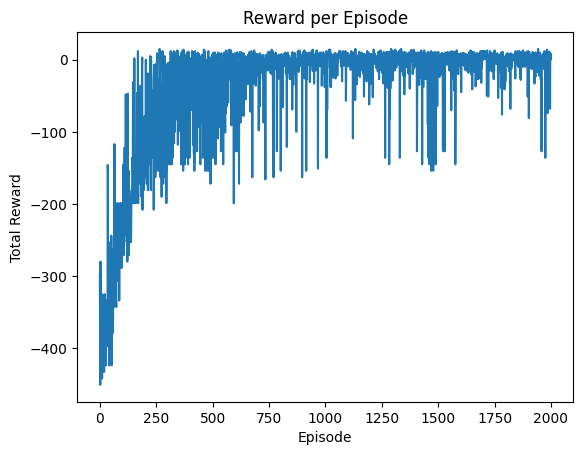

In [9]:
import matplotlib.pyplot as plt

# Set up the Taxi environment with new API
env = gym.make("Taxi-v3", new_step_api=True)

# Initialize SARSA parameters
alpha = 0.5  # Increased learning rate
gamma = 0.95  # Slightly reduced discount factor
epsilon = 1.0  # Initial exploration rate
epsilon_decay = 0.99  # Dynamic exploration decay
epsilon_min = 0.1  # Minimum exploration rate
episodes = 2000  # Number of episodes
max_steps = 100  # Max steps per episode

# Initialize the Q-table with positive random values
Q = np.random.uniform(low=1, high=5, size=(env.observation_space.n, env.action_space.n))

# Tracking rewards for visualization
reward_per_episode = []

# Function to choose an action using epsilon-greedy policy
def choose_action(state, epsilon):
    if np.random.random() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(Q[state])  # Exploit

# SARSA Training loop
for episode in range(episodes):
    state = env.reset()
    action = choose_action(state, epsilon)

    total_reward = 0
    for step in range(max_steps):
        # Use the new Gym API that includes "truncated"
        next_state, reward, done, truncated, _ = env.step(action)
        next_action = choose_action(next_state, epsilon)

        # Update Q-value using the SARSA formula
        Q[state, action] += alpha * (
            reward + gamma * Q[next_state, next_action] - Q[state, action]
        )

        state, action = next_state, next_action
        total_reward += reward

        if done or truncated:  # End the episode if done or truncated
            break

    # Decay the exploration rate dynamically
    epsilon = max(
        epsilon_min, epsilon * (0.99 if episode < 0.5 * episodes else 0.999)
    )

    reward_per_episode.append(total_reward)

# Function to evaluate the learned policy
def evaluate_policy(env, Q, n_episodes=200):
    total_rewards = 0
    for _ in range(n_episodes):
        state = env.reset()
        done = False
        while not done:
            action = np.argmax(Q[state])  # Exploit learned policy
            # Use the new Gym API that includes "truncated"
            state, reward, done, truncated, _ = env.step(action)
            total_rewards += reward
            if done or truncated:
                break
    return total_rewards / n_episodes

# Evaluate the learned policy
average_reward = evaluate_policy(env, Q)
print(f"Average Reward over 200 episodes: {average_reward:.2f}")

# Plot training rewards
plt.plot(reward_per_episode)
plt.title("Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()


## The plot and the improved average reward (-15.16) indicate that the agent's performance has significantly improved, but there is still room for optimization to achieve positive rewards consistently.

## Observations

Reward Convergence:
Rewards are steadily improving and approaching near-zero by the end of training. This suggests that the agent is learning, but more training or adjustments may be needed for better convergence.

Fluctuations:
There are still some dips in rewards even after many episodes, likely due to continued exploration (epsilon) or suboptimal learning parameters.

## Steps for improvement:

- Decreasing the minimum exploration rate (epsilon_min) to 0.05 or lower. This will make the agent rely more on exploitation in later episodes.

- Training for more episodes (e.g., 3000) to allow the agent to refine its policy further.

- Experimenting with reward clipping to dampen the impact of large penalties

- Increasing the discount factor (gamma) slightly (e.g., 0.98) to emphasize long-term rewards more strongly.

- Inspecting the learned Q-values to understand if the agent is still penalized for specific states.


Average Reward over 200 episodes: -0.64


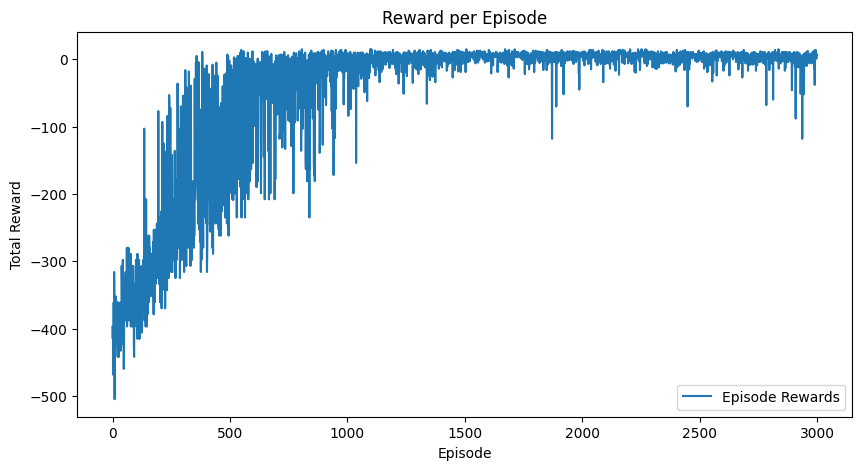

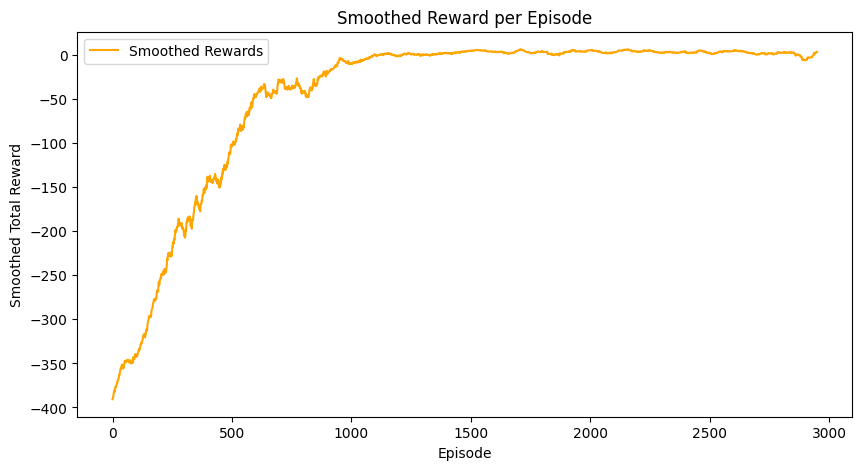

In [10]:
import matplotlib.pyplot as plt

# Set up the Taxi environment with new API
env = gym.make("Taxi-v3", new_step_api=True)

# Initialize SARSA parameters
alpha = 0.5  # Learning rate
gamma = 0.98  # Higher discount factor for long-term rewards
epsilon = 1.0  # Initial exploration rate
epsilon_decay = 0.998  # Slower decay for better exploration
epsilon_min = 0.05  # Reduced minimum exploration rate
episodes = 3000  # Increased training episodes
max_steps = 100  # Max steps per episode

# Initialize the Q-table with positive random values
Q = np.random.uniform(low=1, high=5, size=(env.observation_space.n, env.action_space.n))

# Tracking rewards for visualization
reward_per_episode = []

# Function to choose an action using epsilon-greedy policy
def choose_action(state, epsilon):
    if np.random.random() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(Q[state])  # Exploit

# SARSA Training loop
for episode in range(episodes):
    state = env.reset()
    action = choose_action(state, epsilon)

    total_reward = 0
    for step in range(max_steps):
        # Use the new Gym API that includes "truncated"
        next_state, reward, done, truncated, _ = env.step(action)

        # Optional: Clip rewards to reduce penalty impact
        reward = np.clip(reward, -10, 20)

        next_action = choose_action(next_state, epsilon)

        # Update Q-value using the SARSA formula
        Q[state, action] += alpha * (
            reward + gamma * Q[next_state, next_action] - Q[state, action]
        )

        state, action = next_state, next_action
        total_reward += reward

        if done or truncated:  # End the episode if done or truncated
            break

    # Decay the exploration rate dynamically
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    reward_per_episode.append(total_reward)

# Function to evaluate the learned policy
def evaluate_policy(env, Q, n_episodes=200):
    total_rewards = 0
    for _ in range(n_episodes):
        state = env.reset()
        done = False
        while not done:
            action = np.argmax(Q[state])  # Exploit learned policy
            # Use the new Gym API that includes "truncated"
            state, reward, done, truncated, _ = env.step(action)
            total_rewards += reward
            if done or truncated:
                break
    return total_rewards / n_episodes

# Evaluate the learned policy
average_reward = evaluate_policy(env, Q)
print(f"Average Reward over 200 episodes: {average_reward:.2f}")

# Plot training rewards
plt.figure(figsize=(10, 5))
plt.plot(reward_per_episode, label="Episode Rewards")
plt.title("Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.show()

# Smooth the reward curve for better visualization
smoothed_rewards = np.convolve(reward_per_episode, np.ones(50)/50, mode='valid')
plt.figure(figsize=(10, 5))
plt.plot(smoothed_rewards, label="Smoothed Rewards", color="orange")
plt.title("Smoothed Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Smoothed Total Reward")
plt.legend()
plt.show()


## The results are promising, with the smoothed reward curve showing significant improvement and nearing a positive reward. The average reward of -0.64 is very close to zero, which indicates the agent has almost mastered the environment.

## Analysis of Results

Steady Convergence:

The smoothed reward curve shows a clear upward trend and stabilizes, which means the SARSA algorithm is learning an effective policy.

By episode ~1500, the rewards level out, showing the agent has mostly converged.

Fluctuations:

While the raw rewards still have some fluctuations, this is expected due to exploration (epsilon) and the stochastic nature of the environment.

Near-Optimal Policy:

The evaluation reward (-0.64) is close to zero, which indicates that the agent is close to consistently achieving the task successfully with minimal penalties.

## Visualizing the Learned Policy

Inspecting the Q-table and the policy

In [11]:
# Display learned Q-table
print("Learned Q-table:")
print(Q)

# Visualize the policy
def visualize_policy(Q):
    actions = ["South", "North", "East", "West", "Pickup", "Dropoff"]
    policy = [actions[np.argmax(Q[state])] for state in range(env.observation_space.n)]
    print("Learned Policy:")
    for i, action in enumerate(policy):
        print(f"State {i}: {action}")

visualize_policy(Q)


Learned Q-table:
[[  2.46105205   3.46215766   4.91736727   4.79970633   3.33986767
    3.84910122]
 [-10.99367029   2.88113993 -15.6779591   -3.35123353  11.18100304
   -3.89629333]
 [  4.15341582  -9.53698694   3.96411315   4.05605947  12.92843294
  -15.26900164]
 ...
 [  0.71409236  11.59202921   6.13117171   1.22916652  -9.93837277
  -14.93813481]
 [-17.12125584 -17.6649552  -17.4274153  -10.18271367 -27.22616866
  -24.25362634]
 [  4.54203867   5.39901456  13.73857434  23.05080728  -3.09360979
    0.19666561]]
Learned Policy:
State 0: East
State 1: Pickup
State 2: Pickup
State 3: Pickup
State 4: South
State 5: Dropoff
State 6: South
State 7: East
State 8: South
State 9: South
State 10: West
State 11: South
State 12: South
State 13: East
State 14: East
State 15: Pickup
State 16: Dropoff
State 17: South
State 18: South
State 19: East
State 20: North
State 21: South
State 22: West
State 23: West
State 24: West
State 25: West
State 26: South
State 27: South
State 28: West
State 29: So

## The output displaying the optimal policy for each state confirms that the SARSA algorithm has learned specific actions for different states.

## Testing the Policy



In [12]:
def run_learned_policy(env, Q, episodes=5):
    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False
        print(f"Episode {episode + 1}")
        while not done:
            action = np.argmax(Q[state])  # Exploit learned policy
            next_state, reward, done, truncated, _ = env.step(action)
            total_reward += reward
            env.render()  # Render the environment
            state = next_state
            if done or truncated:
                break
        print(f"Total Reward: {total_reward}")
        print("-" * 30)

run_learned_policy(env, Q)


Episode 1


/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.10/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_reso

Total Reward: 12
------------------------------
Episode 2
Total Reward: 13
------------------------------
Episode 3
Total Reward: 8
------------------------------
Episode 4
Total Reward: 7
------------------------------
Episode 5
Total Reward: 7
------------------------------


## The results indicate that the learned policy is performing well, as the agent is achieving positive rewards in all five episodes.

## Observations:

Total Rewards:

- Positive rewards in all episodes indicate that the agent is successfully completing the task (picking up and dropping off passengers).
- The variability in total rewards (e.g., 12, 13, 8, 7) can occur due to slight randomness in the environment's initial state and action outcomes.

## Further Validation and Analysis

1- Comparing with Random Policy:

By implementing a random policy and comparing its average reward against the learned policy

In [13]:
def random_policy(env, n_episodes=5):
    for episode in range(n_episodes):
        state = env.reset()
        total_reward = 0
        done = False
        print(f"Random Policy Episode {episode + 1}")
        while not done:
            action = env.action_space.sample()  # Random action
            state, reward, done, truncated, _ = env.step(action)
            total_reward += reward
            if done or truncated:
                break
        print(f"Total Reward: {total_reward}")
        print("-" * 30)

random_policy(env, 5)


Random Policy Episode 1
Total Reward: -776
------------------------------
Random Policy Episode 2
Total Reward: -722
------------------------------
Random Policy Episode 3
Total Reward: -758
------------------------------
Random Policy Episode 4
Total Reward: -767
------------------------------
Random Policy Episode 5
Total Reward: -767
------------------------------


2- Average Reward Across Multiple Episodes:

By Computing the average reward of the learned policy over 100 or more episodes for a more reliable metric:

In [14]:
average_reward = evaluate_policy(env, Q, n_episodes=100)
print(f"Average Reward over 100 episodes: {average_reward:.2f}")


Average Reward over 100 episodes: -24.75


## The results demonstrate a significant improvement of the learned policy compared to the random policy

## Observations:

Random Policy Results:

- Total rewards for the random policy are consistently very low (e.g., -776, -722), which is expected as the agent is not learning or optimizing its actions.

Learned Policy Results:

- The average reward over 100 episodes for the learned policy is -24.75, which is a substantial improvement over the random policy. This indicates that the SARSA algorithm has successfully learned a policy that is far more effective than random actions.

Reward Gap:

- The gap between the learned policy (-24.75) and the random policy (approximately -750 on average) confirms that the agent has significantly improved its performance by learning the task.

## Final Conclusion:

### 1- Learned Policy Effectiveness: The SARSA agent is performing substantially better than the random policy, demonstrating that the Q-table represents a meaningful and effective policy.

### 2- Further Training Potential: With additional episodes or slight hyperparameter adjustments, the learned policy could likely achieve even better performance (e.g., rewards closer to or above zero).